In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

/tmp/ipykernel_2084811/3274186680.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import torch

torch.cuda.is_available()
#!/usr/bin/env python3

import sys,os
from elftools.elf.elffile import ELFFile
from elftools.elf.segments import Segment
from capstone import *
from capstone.x86 import *

import os
import json 

import sys,os
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'


# DATASET GENERATION

# Creating the pipeline

In [3]:

MAX_TOKEN_LEN = 1024
BATCH_SIZE = 40
epochs = 10

EXPERIMENT_NAME = 'defaultTokenizer_untrained_ASIS'
# new_vocab_size = 35000
# disassembly_decimal disassembly_all_number_to_words disassembly_decimal 
data_key = "disassembly_decimal"


from transformers import BertTokenizer, BertForNextSentencePrediction,BertForPreTraining,BertConfig,AutoModelForMaskedLM,get_linear_schedule_with_warmup
import torch
from transformers import PreTrainedTokenizerFast ,AutoModelForPreTraining
tokenizer = BertTokenizer.from_pretrained('microsoft/MiniLM-L12-H384-uncased')

# tokenizer = PreTrainedTokenizerFast.from_pretrained("./../../models/" + EXPERIMENT_NAME)
print(tokenizer.pad_token) 



config = BertConfig.from_pretrained("microsoft/MiniLM-L12-H384-uncased")
# Change max_position_embeddings to 1024 in the config
config.max_position_embeddings = 1024
# Load the model with the modified config
model = BertForPreTraining(config)
# Access and modify the positional embeddings
# The model's `bert` attribute holds the BERT layers
model_bert = model.bert  # This is the BERT model itself (the backbone)
# Resize the position embeddings to accommodate the new max length (1024 tokens)
model_bert.embeddings.position_embeddings = torch.nn.Embedding(1024, model_bert.config.hidden_size)
# Optional: Initialize the new embeddings using the original ones for the first 512 positions
with torch.no_grad():
    model_bert.embeddings.position_embeddings.weight[:512, :] = model_bert.embeddings.position_embeddings.weight[:512, :]


# model.resize_token_embeddings(new_vocab_size)

# and move our model over to the selected device
model.to(device)

[PAD]


BertForPreTraining(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 384, padding_idx=0)
      (position_embeddings): Embedding(1024, 384)
      (token_type_embeddings): Embedding(2, 384)
      (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=384, out_features=384, bias=True)
              (key): Linear(in_features=384, out_features=384, bias=True)
              (value): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
              (LayerNorm): LayerNorm((384,), eps=1e-12, eleme

In [4]:



DATA_PATH = '/home/raisul/ANALYSED_DATA/tokenization_data_single_functions'

TRAIN_DATA_PATH  ='/home/raisul/ANALYSED_DATA/tokenization_data_single_functions/train/'

TEST_DATA_PATH   = '/home/raisul/ANALYSED_DATA/tokenization_data_single_functions/test/'




train_json_files = [os.path.join(TRAIN_DATA_PATH, f) for f in os.listdir(TRAIN_DATA_PATH) ]

test_json_files = [os.path.join(TEST_DATA_PATH, f) for f in os.listdir(TEST_DATA_PATH) ]


print(len(train_json_files))
def read_corpus(json_files):

    all = []

    for k, j_file in enumerate(json_files):
        # if k>1000:
        #     break
        try:

            with open(j_file, 'r') as file:
                data = json.load(file)

                funct = data[data_key]['input']
                
                all.append(funct)
        except Exception as e: 
            print(e)
    return all
    


train_text = read_corpus(train_json_files)
test_text  = read_corpus(test_json_files)


        
# text = text[0:5000]
print("Functions Count: ",len(train_text), '\n')
example = train_text[10]
text = train_text + test_text





80000
Functions Count:  80000 



In [5]:
print(text[-1])


ENDBR64
PUSH R15
LEA RDI,[8270]
PUSH R14
PUSH R13
PUSH R12
PUSH RBP
PUSH RBX
SUB RSP,8
CALL 4256
MOVSXD RCX,dword ptr [17568]
CMP ECX,1
JLE 5555
XOR R13D,R13D
LEA RBX,[16576]
LEA R14,[16480]
LEA RBP,[8297]
LEA R12,[16640]
NOP dword ptr [RAX]
XOR EAX,EAX
MOV R15D,4294967295
MOV EDX,987654321
NOP dword ptr [RAX]
MOV ESI,dword ptr [RBX + RAX*4]
TEST ESI,ESI
JNZ 5476
MOV ESI,dword ptr [R12 + RAX*4]
CMP EDX,ESI
CMOVG R15D,EAX
CMOVG EDX,ESI
ADD RAX,1
CMP RCX,RAX
JNZ 5456
MOVSXD RAX,R15D
ADD dword ptr [16560],EDX
MOV RSI,RBP
MOV EDX,R15D
MOV ECX,dword ptr [R14 + RAX*8]
MOV R8D,dword ptr [R14 + RAX*8 + 4]
MOV dword ptr [RBX + RAX*4],1
XOR EAX,EAX
MOV EDI,2
ADD R13D,1
CALL 4288
MOV EDI,R15D
CALL 5104
MOVSXD RCX,dword ptr [17568]
LEA EAX,[RCX + -1]
CMP R13D,EAX
JL 5440
MOV EDX,dword ptr [16560]
ADD RSP,8
LEA RSI,[8321]
XOR EAX,EAX
POP RBX
MOV EDI,2
POP RBP
POP R12
POP R13
POP R14
POP R15
JMP 4288



In [6]:
# text[51].split(delim)

We'll assign a 50% probability of using the genuine next sentence, and 50% probability of using another random sentence.

To make this simpler, we'll create a *'bag'* of individual sentences to pull from when selecting a random sentence B.

In [7]:
delim = '\n'
bag = [instruction for instruction_cluster in text for instruction in instruction_cluster.split(delim)  if instruction!= '']
bag_size = len(bag)
print(bag_size , len(text))

5312741 100000


And now we create our 50/50 NIP training data.

In [8]:
import random

history = []
next_instruction = []
label = []


instruction_pages = []
for instruction_cluster in text:
    instructions = [
        instruction for instruction in instruction_cluster.split(delim) if instruction != ''
    ]

    instruction_pages.append(instructions)

        
print(len(instruction_pages))
print(instruction_pages[0])

for instruction_page in instruction_pages:
        # this is IsNextSentence
        history.append(delim.join(instruction_page))
        next_instruction.append(instruction_page[-1])
        label.append(0)


100000
['ENDBR64', 'PUSH R12', 'LEA RSI,[4608]', 'MOV EDI,2', 'LEA R12,[8253]', 'PUSH RBP', 'LEA RBP,[8262]', 'PUSH RBX', 'XOR EBX,EBX', 'CALL 4224', 'JMP 4323', 'MOV RDI,RBP', 'ADD EBX,1', 'CALL 4208', 'CMP EBX,10000', 'JZ 4352', 'CMP EBX,100', 'JNZ 4304', 'MOV RDI,R12', 'MOV EBX,101', 'CALL 4208', 'MOV RDI,RBP', 'CALL 4208', 'JMP 4304', 'POP RBX', 'XOR EAX,EAX', 'POP RBP', 'POP R12', 'RET']


Our data is now ready for tokenization, this time we truncate/pad each token to the same length of *512* tokens.

In [9]:
inputs = tokenizer(history, next_instruction, return_tensors='pt', 
                   max_length=MAX_TOKEN_LEN, truncation=True, padding=True)
ground_truth = inputs.copy() 

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

In [10]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

We can see that the *token_type_ids* tensors have been built correctly (eg **1** indicating sentence B tokens) by checking the first instance of *token_type_ids*:

And the labels tensor is simply a clone of the input_ids tensor before masking.

In [11]:

inputs['next_sentence_label'] = torch.LongTensor([label]).T
inputs['labels'] = inputs.input_ids.detach().clone()

Now we mask tokens in the input_ids tensor using the 15% probability for MLM - ensuring we don't mask CLS, SEP, or PAD tokens.

In [12]:
# create random array of floats with equal dimensions to input_ids tensor
rand = torch.rand(inputs.input_ids.shape)
# create mask array
mask_arr = (rand < 0.15) * (inputs.input_ids != 101) * \
           (inputs.input_ids != 102) * (inputs.input_ids != 0)

In [13]:
mask_arr.shape
# inputs.input_ids.shape[0]

torch.Size([100000, 1024])

And now take the indices of each True value within each vector.

In [14]:
selection = []

for i in range(inputs.input_ids.shape[0]):
    selection.append(
        torch.flatten(mask_arr[i].nonzero()).tolist()
    )

In [15]:
len (selection) , len(inputs.input_ids), selection[0:3]

(100000,
 100000,
 [[3,
   4,
   5,
   10,
   13,
   21,
   26,
   28,
   41,
   49,
   51,
   54,
   75,
   76,
   78,
   83,
   100,
   111,
   123,
   128,
   130,
   134,
   140],
  [9,
   17,
   19,
   21,
   30,
   37,
   47,
   48,
   52,
   57,
   67,
   74,
   91,
   92,
   93,
   95,
   98,
   102,
   103,
   104,
   107,
   128,
   138,
   144,
   145,
   152,
   153,
   164,
   166,
   167,
   175,
   178,
   181,
   183,
   187,
   199,
   205,
   213,
   214,
   226,
   235,
   249,
   253,
   257,
   259,
   261,
   264,
   271,
   273,
   313,
   314,
   323,
   326,
   345,
   355,
   367,
   379,
   385,
   388,
   392,
   401,
   403,
   413,
   415,
   430,
   438,
   450,
   454,
   457,
   469,
   471,
   479,
   483,
   486,
   492,
   525,
   526,
   531,
   535,
   536,
   538,
   543,
   545,
   548,
   550,
   559,
   568,
   571,
   575,
   581,
   582,
   590,
   601,
   602,
   604,
   605,
   607,
   608,
   623,
   625,
   626,
   655,
   659,
   671,
  

Then apply these indices to each row in input_ids, assigning each value at these indices a value of 103.

In [16]:
masked_labels = []
for i in range(inputs.input_ids.shape[0]):
    masked_labels.append(inputs.input_ids[i, selection[i]])
    inputs.input_ids[i, selection[i]] = 103
# masked_labels[0]
inputs["mask_arr"] = mask_arr

In [17]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'next_sentence_label', 'labels', 'mask_arr'])

The `inputs` tensors are now ready, and we can begin building the model input pipeline for training. We first create a PyTorch dataset from our data.

In [18]:
class MeditationsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    def __len__(self):
        return len(self.encodings.input_ids)

Initialize our data using the `MeditationDataset` class.

In [19]:
dataset = MeditationsDataset(inputs)
# print(inputs.shape)

In [20]:


train_dataset  = torch.utils.data.Subset(dataset, range(len(train_text)))
validation_dataset = torch.utils.data.Subset(dataset, range(len(train_text) , len(dataset)))

len(train_dataset) , len(validation_dataset)

(80000, 20000)

And initialize the dataloader, which we'll be using to load our data into the model during training.

In [21]:

train_loader      = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=BATCH_SIZE, shuffle=False )



Activate the training mode of our model, and initialize our optimizer (Adam with weighted decay - reduces chance of overfitting).

In [22]:
from sklearn.metrics import precision_recall_fscore_support , accuracy_score
import numpy as np


Now we can move onto the training loop, we'll train for a couple of epochs (change `epochs` to modify this).

In [23]:
# odict_keys(['loss', 'prediction_logits', 'seq_relationship_logits'])

In [24]:

from numpy import *
import math
import matplotlib.pyplot as plt


def plot_graph(training_data, validation_data , label ):

    font_size = 10
    x_labels = [ i for i in range(len(training_data)) ]

    plt.ylabel(' F1 ',fontsize=font_size)
    plt.plot(x_labels, training_data , 'r') 
    plt.plot(x_labels, validation_data , 'b') 
    plt.xlabel("Epoch", fontsize=font_size)
    plt.title(label,fontsize=font_size)
    plt.legend(['Training', 'Validation'], loc='upper left') 
    
    plt.savefig('./../../results/'+EXPERIMENT_NAME+label+'.pdf')
    plt.show()
    with open('./../../results/'+EXPERIMENT_NAME+label+'.json', 'w') as json_file:
        json.dump([training_data, validation_data , label], json_file)



In [25]:
from transformers import AdamW
from tqdm import tqdm  # for our progress bar
from itertools import chain



# initialize optimizer
optim = AdamW(model.parameters(), lr=3e-4 ,weight_decay=0.0001)

# Number of training steps per epoch
train_steps = len(train_loader)

# Define the number of total training steps and warmup steps
total_steps = train_steps * epochs
warmup_steps = int(total_steps * 0.1)  # 10% of total steps as warmup

# Scheduler setup
scheduler = get_linear_schedule_with_warmup(optim,
                                            num_warmup_steps=warmup_steps,
                                            num_training_steps=total_steps)

/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 0: 100%|██████████| 2000/2000 [26:43<00:00,  1.25it/s, loss=0.379]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

Training:   Instruction f1:  0.0   Masked Token f1:  0.042375547464596305  masked_token_precision:  0.07291025783670496  masked_token_recall:  0.07309744296316792  masked_token_accuracy  0.07309744296316792     SEQ F1 0.6253538931905971


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:12<00:00,  3.78it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

0 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.05227737509246782 v_seq_accuracy:  0.940612841796875  v_masked_token_precision :  0.15906866065362518 v_masked_token_recall: 0.11014030289216431  V SEQ F1:  0.9442898692497903


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


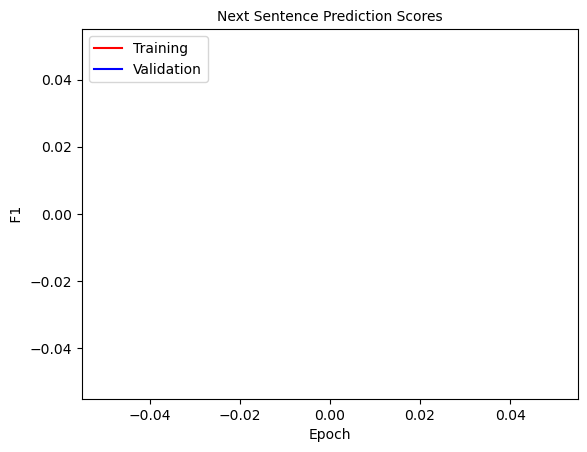

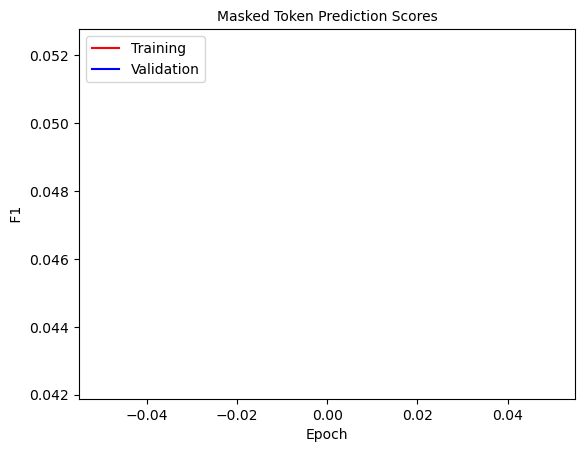

[2024-12-19 20:49:54,990] [INFO] [real_accelerator.py:219:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/home/raisul/anaconda3/envs/pytorch/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
/home/raisul/anaconda3/envs/pytorch/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 1: 100%|██████████| 2000/2000 [26:52<00:00,  1.24it/s, loss=0.113]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this beha

Training:   Instruction f1:  0.0   Masked Token f1:  0.1802431129911453  masked_token_precision:  0.289113749917124  masked_token_recall:  0.19844634355669444  masked_token_accuracy  0.19844634355669444     SEQ F1 0.947200313969245


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:12<00:00,  3.76it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

1 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.6162537172135683 v_seq_accuracy:  0.97927451171875  v_masked_token_precision :  0.6144648610392502 v_masked_token_recall: 0.6429419768158772  V SEQ F1:  0.9790925082833859


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


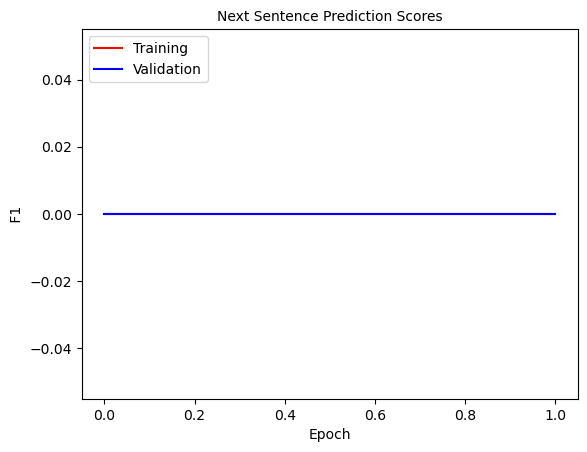

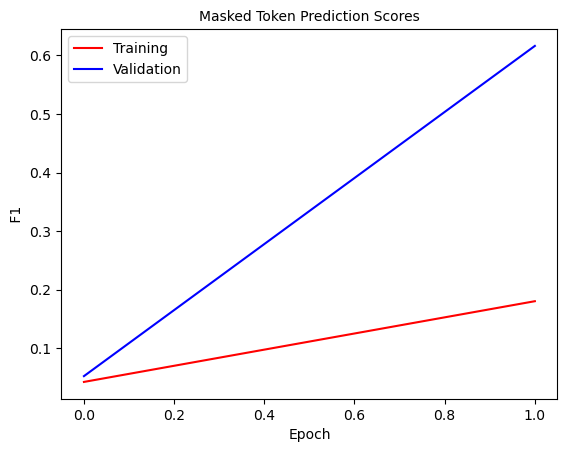

  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 2: 100%|█████████| 2000/2000 [26:49<00:00,  1.24it/s, loss=0.0476]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.6931295054683501  masked_token_precision:  0.6844870858468479  masked_token_recall:  0.710223804823846  masked_token_accuracy  0.710223804823846     SEQ F1 0.9818981185155673


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:13<00:00,  3.76it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

2 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.8012626001829909 v_seq_accuracy:  0.989252783203125  v_masked_token_precision :  0.7989339367208385 v_masked_token_recall: 0.8135043935257716  V SEQ F1:  0.9891777026562313


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


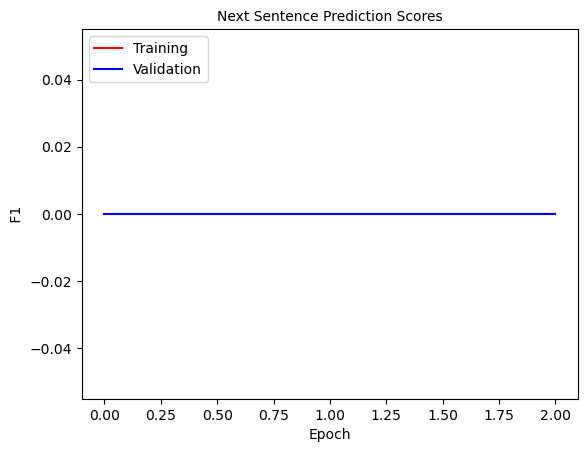

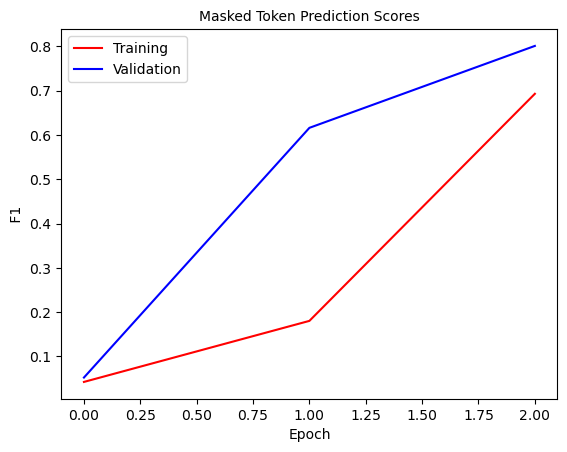

  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 3: 100%|█████████| 2000/2000 [26:46<00:00,  1.25it/s, loss=0.0345]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.7962008890518533  masked_token_precision:  0.7910074140362082  masked_token_recall:  0.807186692122326  masked_token_accuracy  0.807186692122326     SEQ F1 0.9883552883701544


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:12<00:00,  3.77it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

3 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.8339378781635131 v_seq_accuracy:  0.991058740234375  v_masked_token_precision :  0.8338304921670762 v_masked_token_recall: 0.8436896883574624  V SEQ F1:  0.991011615898166


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


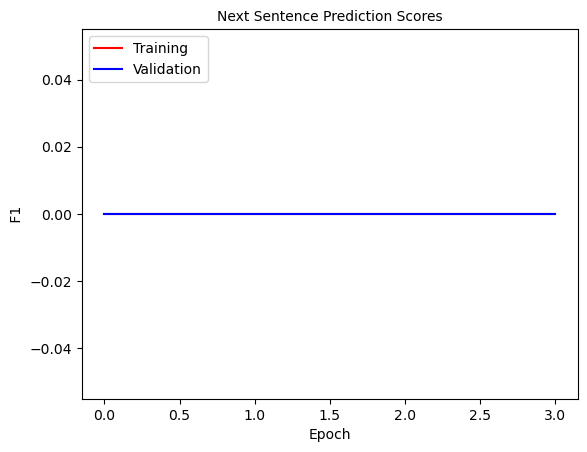

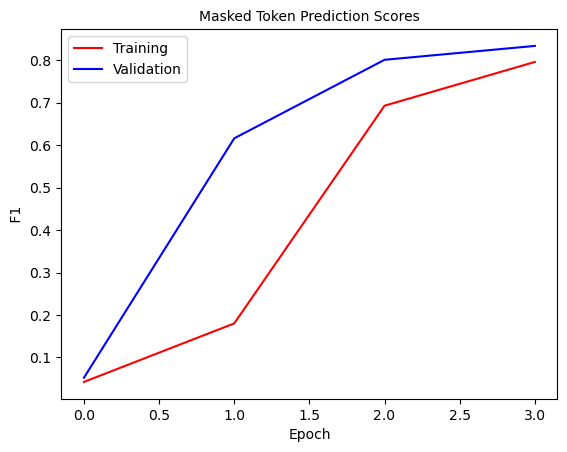

  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 4: 100%|██████████| 2000/2000 [26:45<00:00,  1.25it/s, loss=0.029]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.8298086599437202  masked_token_precision:  0.8264184509465071  masked_token_recall:  0.8380189101884974  masked_token_accuracy  0.8380189101884974     SEQ F1 0.9903914896683953


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:12<00:00,  3.77it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

4 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.8548913530642778 v_seq_accuracy:  0.99211640625  v_masked_token_precision :  0.8554197335782873 v_masked_token_recall: 0.861638433176665  V SEQ F1:  0.9920811160684839


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


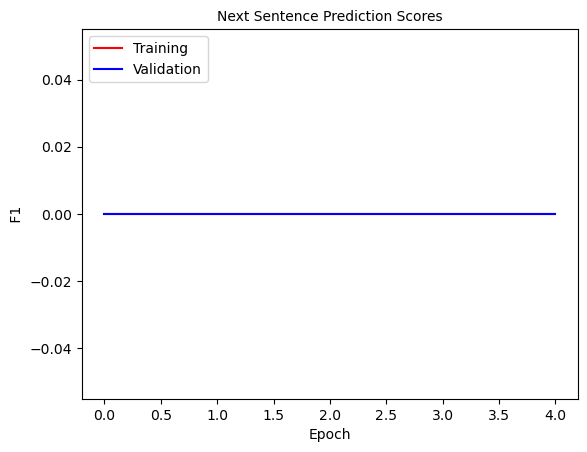

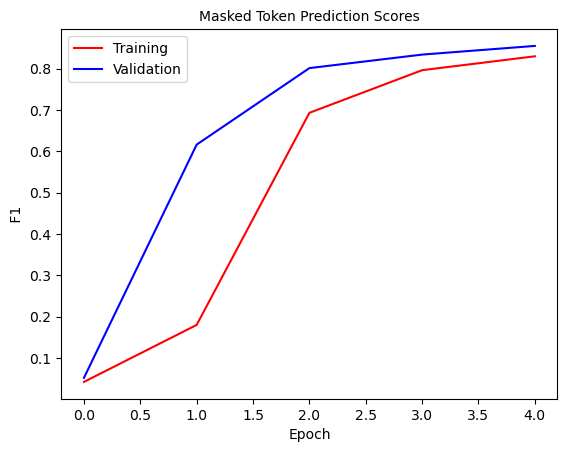

  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 5: 100%|██████████| 2000/2000 [26:48<00:00,  1.24it/s, loss=0.026]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.8499188824484555  masked_token_precision:  0.8476026580171305  masked_token_recall:  0.8563887951164937  masked_token_accuracy  0.8563887951164937     SEQ F1 0.991570802530119


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:12<00:00,  3.77it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

5 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.867507369683541 v_seq_accuracy:  0.992758642578125  v_masked_token_precision :  0.8685777999067313 v_masked_token_recall: 0.8727108866171686  V SEQ F1:  0.9927361926334345


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


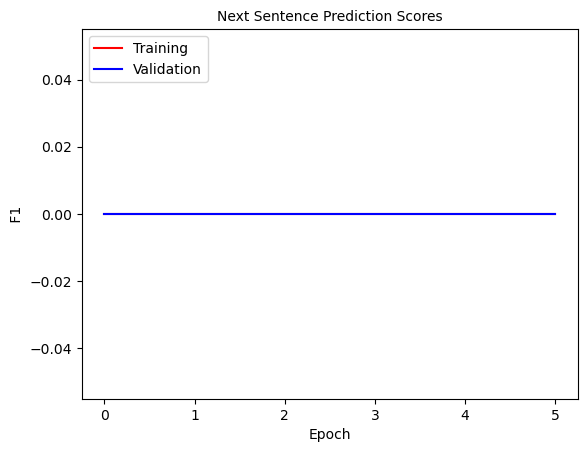

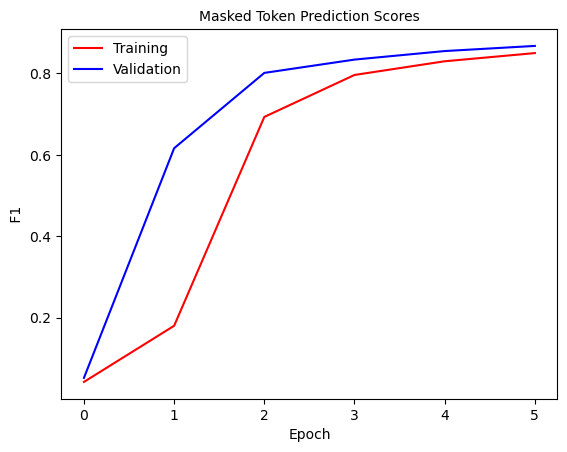

  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 6: 100%|█████████| 2000/2000 [26:43<00:00,  1.25it/s, loss=0.0233]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.8642384391801577  masked_token_precision:  0.8626731361950339  masked_token_recall:  0.8695125418729811  masked_token_accuracy  0.8695125418729811     SEQ F1 0.9923976660348331


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:12<00:00,  3.77it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

6 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.8778499068532171 v_seq_accuracy:  0.993293408203125  v_masked_token_precision :  0.8795258947162047 v_masked_token_recall: 0.8818813128005212  V SEQ F1:  0.9932756685858294


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


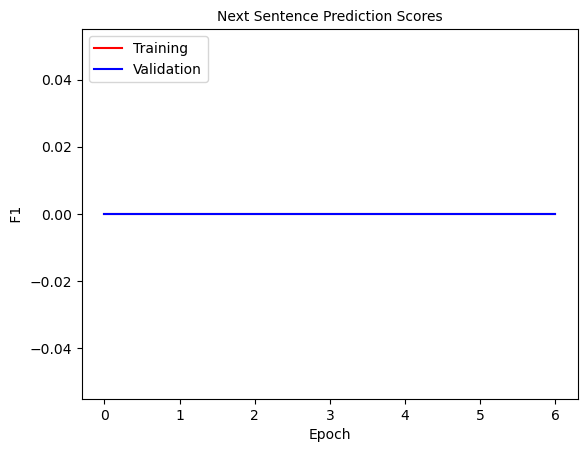

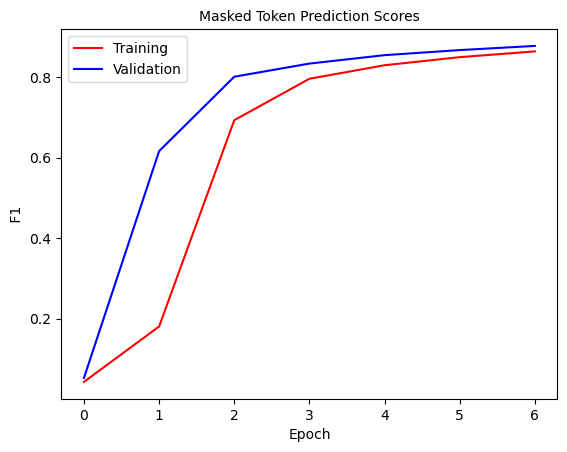

  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 7: 100%|█████████| 2000/2000 [26:46<00:00,  1.24it/s, loss=0.0211]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.8749055437057613  masked_token_precision:  0.8737668071811925  masked_token_recall:  0.8793669719585503  masked_token_accuracy  0.8793669719585503     SEQ F1 0.9930085003882697


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:12<00:00,  3.78it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

7 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.8850922326220297 v_seq_accuracy:  0.9936849609375  v_masked_token_precision :  0.8864961496385889 v_masked_token_recall: 0.8886440763815023  V SEQ F1:  0.9936673869988375


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


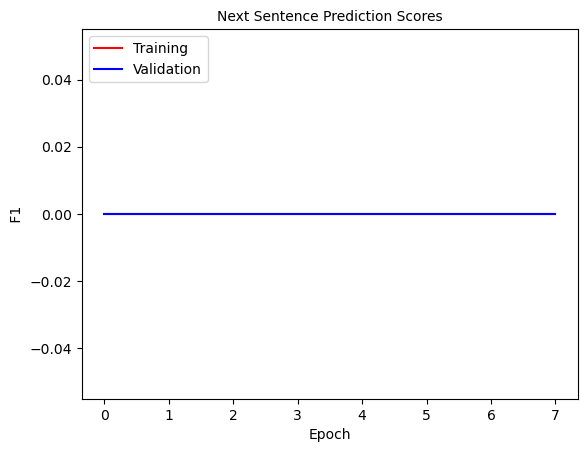

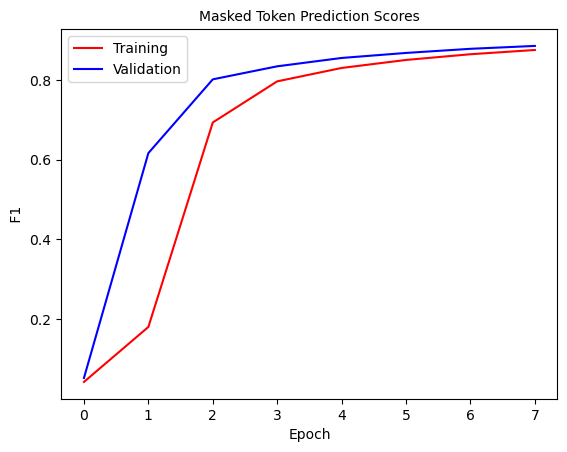

  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 8: 100%|█████████| 2000/2000 [26:44<00:00,  1.25it/s, loss=0.0197]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.8830904263674804  masked_token_precision:  0.8825023038789489  masked_token_recall:  0.8869787930848999  masked_token_accuracy  0.8869787930848999     SEQ F1 0.993471461281122


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:11<00:00,  3.79it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

8 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.8903454852748562 v_seq_accuracy:  0.993972119140625  v_masked_token_precision :  0.891225212262886 v_masked_token_recall: 0.8936008746880169  V SEQ F1:  0.9939495551185106


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


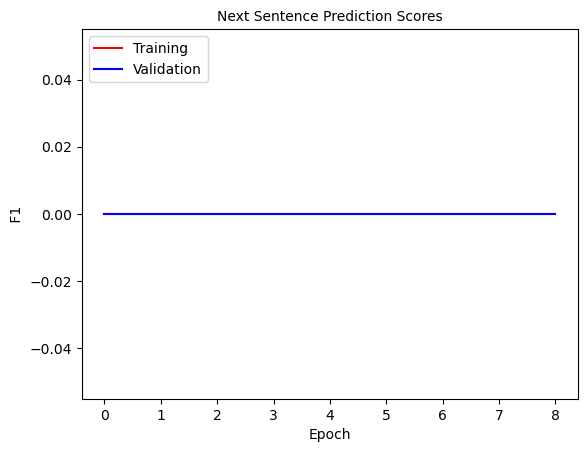

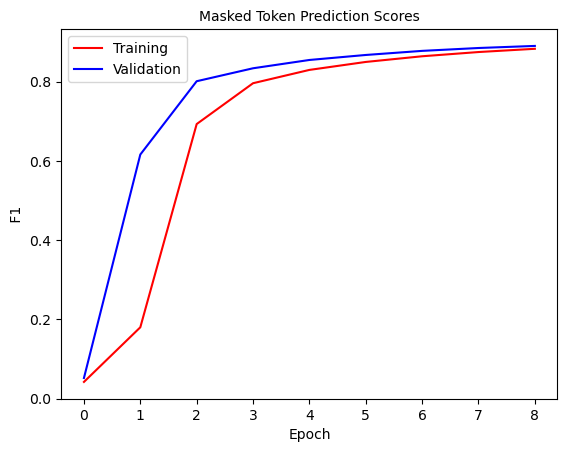

  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 9: 100%|█████████| 2000/2000 [26:44<00:00,  1.25it/s, loss=0.0187]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.8888549929666847  masked_token_precision:  0.888572889502455  masked_token_recall:  0.8924012500302775  masked_token_accuracy  0.8924012500302775     SEQ F1 0.9938023178049441


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2084811/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:12<00:00,  3.77it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

9 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.8935165124996832 v_seq_accuracy:  0.99412783203125  v_masked_token_precision :  0.8942433188011477 v_masked_token_recall: 0.8963037095644549  V SEQ F1:  0.994106402622217


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


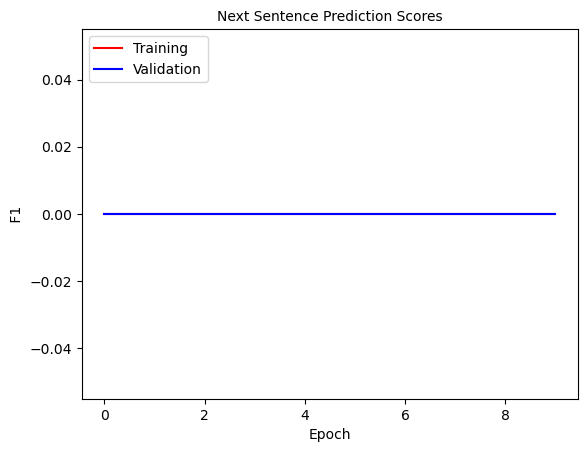

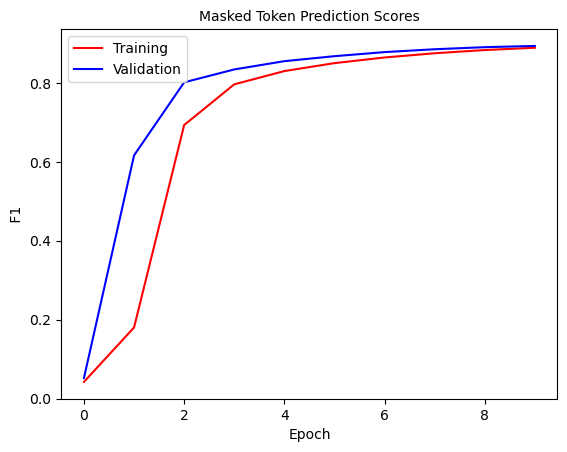

In [26]:


counter = 0

global_instruction_metrices = []
global_masked_token_metrices = []

v_global_instruction_metrices = []
v_global_masked_token_metrices = []


for epoch in range(epochs):
    # setup loop with TQDM and dataloader
    train_loop = tqdm(train_loader, leave=True)
    
    
    instruction_predictions_all, instruction_ground_truths_all = None, None
    masked_token_predictions_all, masked_token_ground_truths_all = None, None
    seq_predictions_all, seq_ground_truths_all = None, None
    
    # activate training mode
    model.train()
    for N,batch in enumerate(train_loop):

        optim.zero_grad()
        # pull all tensor batches required for training
        input_ids = batch['input_ids'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        next_sentence_label = batch['next_sentence_label'].to(device)
        batch_mask_arr = batch ['mask_arr']
        labels = batch['labels'].to(device)

        # process
        outputs = model(input_ids, attention_mask=attention_mask,
                        token_type_ids=token_type_ids,
                        next_sentence_label=next_sentence_label,
                        labels=labels)


        token_prediction = torch.argmax(outputs.prediction_logits, axis=-1)
       


        # batch_masks = selection [BATCH_SIZE*N : (BATCH_SIZE*(N+1))]
        # print('batch_masks old: ',batch_masks)

        # print(batch ['mask_arr'].shape) #torch.flatten(mask_arr[i].nonzero()).tolist()
        batch_masks =   [ torch.flatten(bm.nonzero()).tolist()  for bm in batch_mask_arr]    # torch.flatten(batch ['mask_arr'].nonzero()).tolist()
        # print('batch_masks new: ',batch_masks)
        
        # print("BATCH_SIZE*N : (BATCH_SIZE*(N+1)): ",BATCH_SIZE*N , (BATCH_SIZE*(N+1)) )
        # print("batch_masks:",batch_masks)



        

        masked_token_prediction = [ token[batch_masks[t]].tolist() for t,token in enumerate(token_prediction) ]
        masked_token_prediction = list(chain.from_iterable(masked_token_prediction))
        
        masked_token_ground_truth   = [ token[batch_masks[t]].tolist() for t,token in enumerate(labels) ]
        masked_token_ground_truth = list(chain.from_iterable(masked_token_ground_truth))
        

        # print(token_prediction , token_ground_truth)

        # token_prediction = token_prediction.detach().cpu().numpy().flatten()
        # token_ground_truth = labels.detach().cpu().numpy().flatten()

        # print("token_prediction  : ", token_prediction)
        # print("token_ground_truth: ", token_ground_truth)


        seq_predictions   = token_prediction.detach().cpu().numpy().flatten()
        seq_ground_truths = labels.detach().cpu().numpy().flatten()

        
        instruction_prediction = torch.argmax(outputs.seq_relationship_logits, axis=-1)
        instruction_prediction   = instruction_prediction.detach().cpu().numpy().flatten()
        instruction_ground_truth = next_sentence_label.detach().cpu().numpy().flatten()
        
        if N==0:
            instruction_predictions_all   = instruction_prediction
            instruction_ground_truths_all = instruction_ground_truth
            
            masked_token_predictions_all         = masked_token_prediction
            masked_token_ground_truths_all       = masked_token_ground_truth  


            seq_predictions_all = seq_predictions
            seq_ground_truths_all = seq_ground_truths
            
        else:
            instruction_predictions_all   = np.concatenate((instruction_predictions_all, instruction_prediction))
            instruction_ground_truths_all = np.concatenate((instruction_ground_truths_all, instruction_ground_truth))
            
            masked_token_predictions_all   = np.concatenate((masked_token_predictions_all, masked_token_prediction))
            masked_token_ground_truths_all = np.concatenate((masked_token_ground_truths_all, masked_token_ground_truth))

            seq_predictions_all = np.concatenate((seq_predictions_all, seq_predictions))
            seq_ground_truths_all = np.concatenate((seq_ground_truths_all, seq_ground_truths))
            

        # extract loss
        loss = outputs.loss
        # calculate loss for every parameter that needs grad update
        loss.backward()
        # update parameters
        optim.step()
        scheduler.step()
        # print relevant info to progress bar
        train_loop.set_description(f'Epoch {epoch}')
        train_loop.set_postfix(loss=loss.item())
    
    
    instruction_accuracy = (accuracy_score(instruction_ground_truths_all,instruction_predictions_all))
    instruction_precision, instruction_recall, instruction_f1, _ = precision_recall_fscore_support(instruction_ground_truths_all,instruction_predictions_all, average='binary')
    
    masked_token_accuracy = (accuracy_score(masked_token_ground_truths_all, masked_token_predictions_all))
    masked_token_precision, masked_token_recall, masked_token_f1, _ = precision_recall_fscore_support(masked_token_ground_truths_all,masked_token_predictions_all,average='weighted')

    seq_precision, seq_recall, seq_f1, _ = precision_recall_fscore_support(seq_ground_truths_all,seq_predictions_all,average='weighted')
    
    print("Training: ",  ' Instruction f1: ', instruction_f1 , '  Masked Token f1: ',masked_token_f1 , ' masked_token_precision: ', masked_token_precision, ' masked_token_recall: ', masked_token_recall, ' masked_token_accuracy ', masked_token_accuracy,"    SEQ F1",seq_f1)
    global_instruction_metrices.append(instruction_f1)
    global_masked_token_metrices.append( masked_token_f1) 

    ###########################################
    ###############  EVAL Validation  #########
    ###########################################
    with torch.no_grad():
        model.eval()
#         v_predictions_all, v_ground_truths_all = None, None
        
        v_instruction_predictions_all, v_instruction_ground_truths_all = None, None
        v_masked_token_predictions_all, v_masked_token_ground_truths_all = None, None
        v_seq_predictions_all, v_seq_ground_truths_all = None, None
    
    
        validation_loop = tqdm(validation_loader, leave=True)
        for N,v_batch in enumerate(validation_loop):
            
            
            
            v_input_ids = v_batch['input_ids'].to(device)
            v_token_type_ids = v_batch['token_type_ids'].to(device)
            v_attention_mask = v_batch['attention_mask'].to(device)
            v_next_sentence_label = v_batch['next_sentence_label'].to(device)
            v_mask_arr = v_batch ['mask_arr']
            v_labels = v_batch['labels'].to(device)
            # process
            v_outputs = model(v_input_ids, attention_mask=v_attention_mask,
                            token_type_ids=v_token_type_ids,
                            next_sentence_label=v_next_sentence_label,
                            labels=v_labels)
        
            v_token_prediction = torch.argmax(v_outputs.prediction_logits, axis=-1)

                    

            v_batch_masks =   [ torch.flatten(bm.nonzero()).tolist()  for bm in v_mask_arr]
            
            v_masked_token_prediction = [ token[v_batch_masks[t]].tolist() for t,token in enumerate(v_token_prediction) ]
            v_masked_token_prediction = list(chain.from_iterable(v_masked_token_prediction))
            
            v_masked_token_ground_truth   = [ token[v_batch_masks[t]].tolist() for t,token in enumerate(v_labels) ]
            v_masked_token_ground_truth = list(chain.from_iterable(v_masked_token_ground_truth))
    
            
            

            v_seq_prediction = v_token_prediction.detach().cpu().numpy().flatten()
            v_seq_ground_truth = v_labels.detach().cpu().numpy().flatten()


            

            # token_prediction = [ token[batch_masks[t]].tolist() for t,token in enumerate(token_prediction) ]
            # token_prediction = list(chain.from_iterable(token_prediction))
            
            # token_ground_truth   = [ token[batch_masks[t]].tolist() for t,token in enumerate(labels) ]
            # token_ground_truth = list(chain.from_iterable(token_ground_truth))

            
            v_instruction_prediction = torch.argmax(v_outputs.seq_relationship_logits, axis=-1)
            v_instruction_prediction   = v_instruction_prediction.detach().cpu().numpy().flatten()
            v_instruction_ground_truth = v_next_sentence_label.detach().cpu().numpy().flatten()



        

            if N==0:
                v_instruction_predictions_all   = v_instruction_prediction
                v_instruction_ground_truths_all = v_instruction_ground_truth

                v_masked_token_predictions_all   = v_masked_token_prediction
                v_masked_token_ground_truths_all = v_masked_token_ground_truth
                
                v_seq_predictions_all= v_seq_prediction
                v_seq_ground_truths_all = v_seq_ground_truth

        

            else:
                v_instruction_predictions_all   = np.concatenate((v_instruction_predictions_all, v_instruction_prediction))
                v_instruction_ground_truths_all = np.concatenate((v_instruction_ground_truths_all, v_instruction_ground_truth))

                v_masked_token_predictions_all   = np.concatenate((v_masked_token_predictions_all, v_masked_token_prediction ))
                v_masked_token_ground_truths_all = np.concatenate((v_masked_token_ground_truths_all, v_masked_token_ground_truth ))
                
                v_seq_predictions_all =np.concatenate((v_seq_predictions_all, v_seq_prediction ))
                v_seq_ground_truths_all =np.concatenate((v_seq_ground_truths_all, v_seq_ground_truth ))
                

            

        v_instruction_accuracy = (accuracy_score(v_instruction_ground_truths_all,v_instruction_predictions_all))
        v_instruction_precision, v_instruction_recall, v_instruction_f1, _ = precision_recall_fscore_support(v_instruction_ground_truths_all,v_instruction_predictions_all, average='binary')


        v_masked_token_accuracy = (accuracy_score(v_masked_token_ground_truths_all, v_masked_token_predictions_all))
        v_masked_token_precision, v_masked_token_recall, v_masked_token_f1, _ = precision_recall_fscore_support(v_masked_token_ground_truths_all,v_masked_token_predictions_all,average='weighted')


        v_seq_accuracy = (accuracy_score(v_seq_predictions_all, v_seq_ground_truths_all))
        v_seq_precision, v_seq_recall, v_seq_f1, _ = precision_recall_fscore_support(v_seq_ground_truths_all,v_seq_predictions_all,average='weighted')
    
        print(epoch,"Validation: ", "Instruction F1: ", v_instruction_f1,  "   v_masked_token_ F1: ",v_masked_token_f1,'v_seq_accuracy: ',v_seq_accuracy,' v_masked_token_precision : ',v_masked_token_precision,'v_masked_token_recall:', v_masked_token_recall," V SEQ F1: ", v_seq_f1)
        
        v_global_instruction_metrices.append(v_instruction_f1)
        v_global_masked_token_metrices.append(v_masked_token_f1) 

    
    plot_graph(global_instruction_metrices, v_global_instruction_metrices, 'Next Sentence Prediction Scores')
    plot_graph(global_masked_token_metrices, v_global_masked_token_metrices, 'Masked Token Prediction Scores')
    model.save_pretrained("./../../models/"+EXPERIMENT_NAME+"_model.ckpt")

In [27]:
a=[0,1,2,3,4,5]
a[0:3]

[0, 1, 2]